# Ensembles Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read data from CSV file into a DataFrame
df = pd.read_csv('rw_data.csv')

In [3]:
print(df['PRE20_mean_median'][0])
print(df['PRE20_efficiency_gap'][0])
print(df['PRE20_partisan_bias'][0])
print(df['cut_edges'][0])

-0.0106376459553084
-0.0360372344270922
-0.0531914893617021
4781


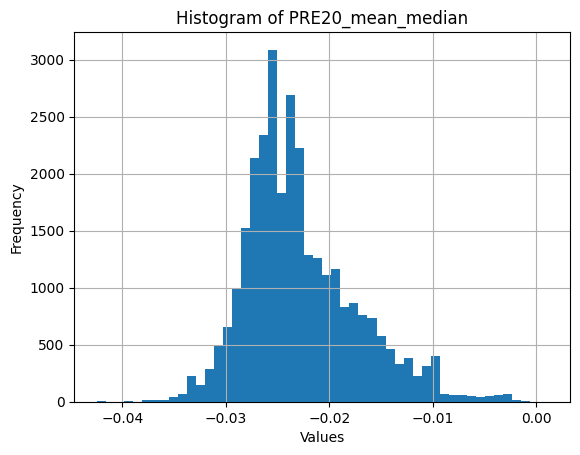

In [4]:
column_name = 'PRE20_mean_median'
df[column_name].hist(bins=50)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

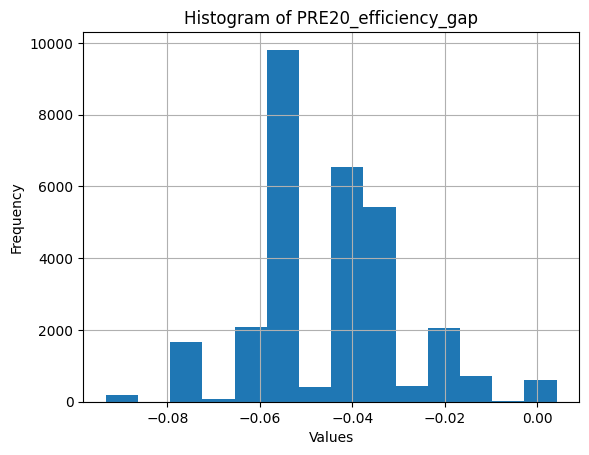

In [5]:
column_name = 'PRE20_efficiency_gap'
df[column_name].hist(bins=14)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

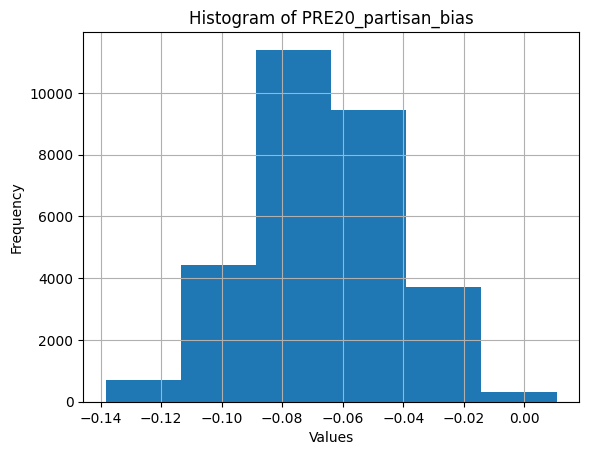

In [6]:
column_name = 'PRE20_partisan_bias'
df[column_name].hist(bins=6)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

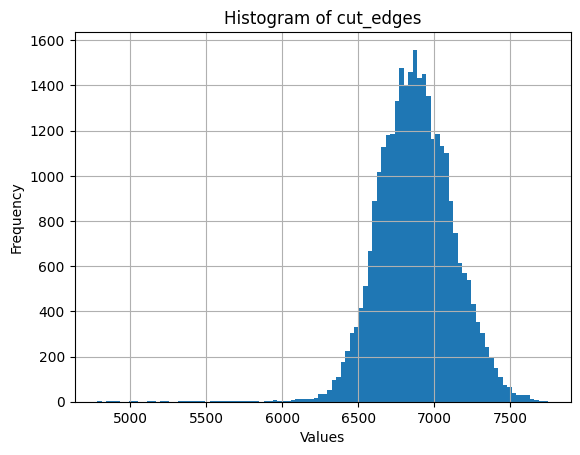

In [7]:
column_name = 'cut_edges'
df[column_name].hist(bins=100)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

In [8]:
nat_maj_df = pd.DataFrame()
nat_vap_maj_df = pd.DataFrame()
for i in range (1, 48):
    pop_col = f'population_{i}'
    vap_col = f'voting age population_{i}'
    native_pop_col = f'native population_{i}'
    vap_native_pop_col = f'native voting age population_{i}'

    nat_maj_df[i] = df[native_pop_col] > df[pop_col]*0.5
    nat_vap_maj_df[i] = df[vap_native_pop_col] > df[vap_col]*0.5

nat_maj_df['Maj Native American Dist'] = nat_maj_df.sum(axis=1)
nat_vap_maj_df['Maj VAP Native American Dist'] = nat_vap_maj_df.sum(axis=1)

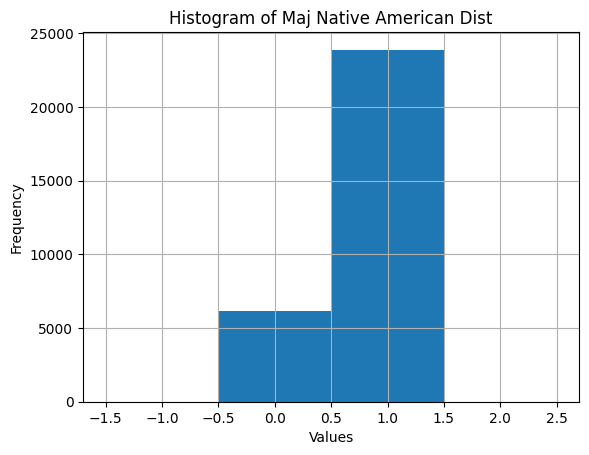

In [9]:
column_name = 'Maj Native American Dist'
nat_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

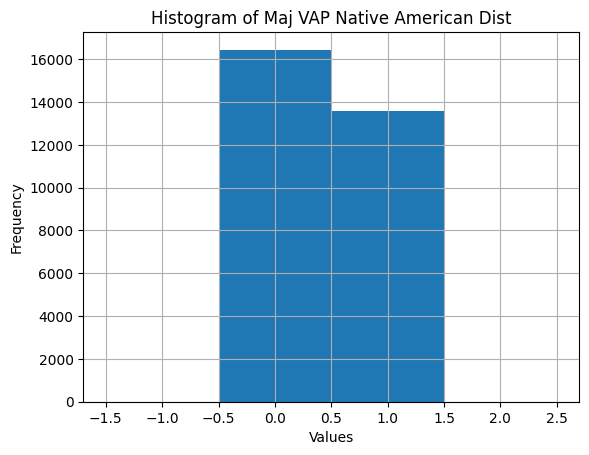

In [10]:
column_name = 'Maj VAP Native American Dist'
nat_vap_maj_df[column_name].hist(bins=range(-1, 4, 1), align='left')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(column_name))
plt.grid(True)
plt.show()

In [11]:
agg_dem_win_df = pd.DataFrame()
for election in ["PRE20", "GOV20", "AUD20", "HAL20", "TRE20", "PSC20"]:
    election_dem_win_df = pd.DataFrame()
    for i in range (1, 48):
        pres_dem_col = f'{election}_Democratic_{i}'
        pres_rep_col = f'{election}_Republican_{i}'
    
        election_dem_win_df[i] = df[pres_dem_col] > df[pres_rep_col]
    
    agg_dem_win_df[f'{election}_Democratic Win Districts'] = election_dem_win_df.sum(axis=1)

In [12]:
aggred_dem_win_df

,PRE20_Democratic Win Districts,GOV20_Democratic Win Districts,AUD20_Democratic Win Districts,HAL20_Democratic Win Districts,TRE20_Democratic Win Districts,PSC20_Democratic Win Districts
0,6,1,4,3,4,4
1,6,1,4,3,4,4
2,6,1,4,3,4,4
3,6,1,4,3,4,4
4,6,1,4,3,4,4
...,...,...,...,...,...,...
29996,6,1,4,3,4,4
29997,6,1,4,3,4,4
29998,6,1,4,3,4,4
29999,6,1,4,3,4,4


In [13]:
agg_dem_win_df['AVG_Democratic Win Districts'] = aggred_dem_win_df.mean(axis=1)
agg_dem_win_df['AVG_Democratic Win Districts']

0        3.666667
1        3.666667
2        3.666667
3        3.666667
4        3.666667
           ...   
29996    3.666667
29997    3.666667
29998    3.666667
29999    3.666667
30000    3.500000
Name: AVG_Democratic Win Districts, Length: 30001, dtype: float64

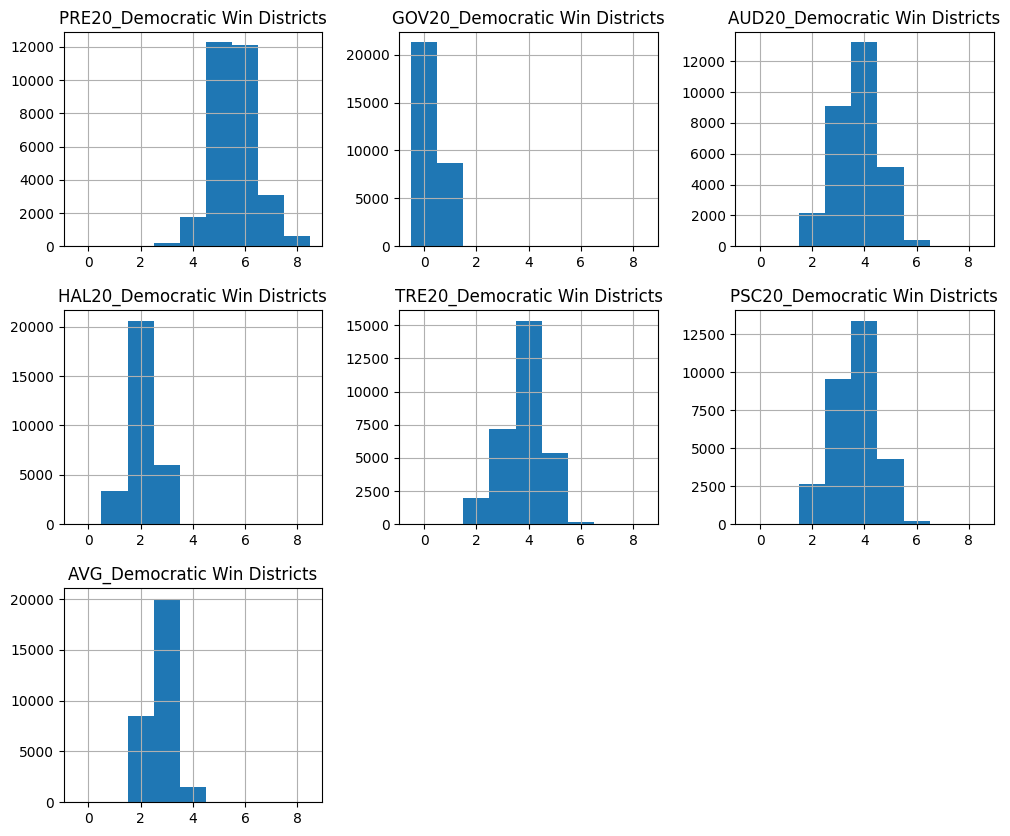

In [18]:
aggred_dem_win_df.hist(bins=range(0, 10, 1), align='left', figsize=(12,10))
plt.xticks(range(1, 11))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()